*De La Salle University – Dasmariñas*  
*College of Information and Computer Studies*

***S–CSIS312 — Natural Language Processing***  
***Lab Activity No. 2***

# Machine Problem: N-grams and Text Analysis

## Objective
Students will implement a text analysis tool that uses n-grams to identify the most common phrases in a given text.

This will enhance their understanding of natural language processing and provide practical experience with Python programming.

## Problem Statement
You are tasked with creating a Python program that analyzes a given text and generates the most common n-grams (bigrams and trigrams). Your program should preprocess the text, extract the n-grams, count their frequencies, and display the results in a user-friendly format.

## Requirements

1. **Input Text:** Allow users to input a text string (can be a paragraph or a few sentences).
2. **Preprocessing:**
    - Convert the text to lowercase.
    - Remove punctuation and special characters.
    - Tokenize the text into words.
3. **N-gram Generation:**
    - Generate both bigrams (2-grams) and trigrams (3-grams) from the tokenized text.
4. **Frequency Count:**
    - Count the frequency of each n-gram.
    - Display the top 10 most common bigrams and trigrams, along with their counts.
5. **Visualization (Optional):**
    - Use matplotlib to create horizontal bar charts for the top 10 bigrams and trigrams.

## Instructions

1. **Set Up:** Ensure you have the necessary Python libraries installed. You will need `nltk`, `collections`, and `matplotlib`.
2. **Implementation:**
    - Write functions to:
      - Preprocess the text.
      - Generate n-grams.
      - Count n-gram frequencies.
      - (Optional) Plot the results.
    - Combine these functions in a main program that executes the text analysis.
3. **Testing:**
    - Test your program with different texts. Try using texts from various sources (e.g., articles,
speeches, or social media).
4. **Submission:** Submit your Python script and a short report (1-2 pages) that includes:
    - A description of your approach.
    - Sample input and output.
    - Insights you gained from your analysis.
    - Submit the .ipynb file

## Defining the N–gram Generation

Let’s first create functions that will build the n-gram model and calculate frequencies and probabilities.

In [1]:
from collections import defaultdict, Counter
import re
import matplotlib.pyplot as plt

In [2]:
def build_ngram_model(words: list[str], n: int):
  """Build an N–gram model."""
  ngrams = defaultdict(list)
  
  # For every word (subtracted by n and added by 1),
  # create a “gram” — a tuple of a series of words next to each other
  for i in range(len(words) - n + 1):
    gram = tuple(words[i:i+n])
    next_word = words[i + n] if i + n < len(words) else None
    if next_word:
        ngrams[gram].append(next_word)
  
  return ngrams


def calculate_ngram_probabilities(ngrams: dict):
    """Calculate probabilities for an N-gram model."""
    ngram_probabilities = {}
    
    # Count the occurrences of each n-gram
    for ngram, next_words in ngrams.items():
        ngram_count = len(next_words)
        ngram_prefix = ngram[:-1]  # All words except the last one
        last_word = ngram[-1]  # The last word in the n-gram

        if ngram_prefix not in ngram_probabilities:
            ngram_probabilities[ngram_prefix] = {}

        # Count occurrences of next words
        for next_word in next_words:
            if next_word not in ngram_probabilities[ngram_prefix]:
                ngram_probabilities[ngram_prefix][next_word] = 0
            ngram_probabilities[ngram_prefix][next_word] += 1

        # Calculate probabilities
        ngram_probabilities[ngram_prefix] = {
            word: count / ngram_count
            for word, count in ngram_probabilities[ngram_prefix].items()
        }

    return ngram_probabilities

In [3]:
def count_ngram_frequencies(ngrams: dict):
    """Count the frequency of each n-gram."""
    ngram_frequencies = Counter()

    # Count occurrences of each n-gram
    for ngram, next_words in ngrams.items():
        ngram_frequencies[ngram] += len(next_words)  # Increment count by number of occurrences

    return ngram_frequencies

In [4]:
def display_top_ngrams(ngram_frequencies, top_n=10):
    """Display the top N most common n-grams."""
    most_common_ngrams = ngram_frequencies.most_common(top_n)

    for ngram, count in most_common_ngrams:
        print(f"{ngram}: {count}")

## Asking for Input and Preprocessing the Text

In [5]:
def preprocess_text(user_input):
    """Ask for input, convert to lowercase, filter out punctuation and split."""
    processed_text: list[str] = re.sub(r'[^a-zñáéíóúü\s]', '', user_input.lower()).split()

    return processed_text

## Plotting the Results

In [6]:
def plot_ngram_frequencies(ngram_frequencies, title="N-gram Frequencies", top_n=10):
    """Sort n-grams by frequency and select the top N, then create the bar plot."""

    # Sort n-grams by frequency and select the top N
    sorted_ngrams = sorted(ngram_frequencies.items(), key=lambda x: x[1], reverse=True)[:top_n]
    ngrams, frequencies = zip(*sorted_ngrams)

    # Create bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(ngrams)), frequencies, color='skyblue')
    plt.xticks(range(len(ngrams)), [' '.join(ngram) for ngram in ngrams], rotation=45, ha='right')
    plt.xlabel("N-grams")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.tight_layout()
    plt.show()

## Combining Functions Together

In [7]:
def create_ngram_frequencies_label(n: int, top_n_count: int):
    """Define what kind of N-gram is on there."""

    if n == 2:
        ngram_frequencies_label = f"Top {top_n_count} Bigrams:"
    elif n == 3:
        ngram_frequencies_label = f"Top {top_n_count} Trigrams:"
    else:
        ngram_frequencies_label = f"Top {top_n_count} N-grams wherein N={n}:"
    
    return ngram_frequencies_label

In [8]:
def analyze_text(processed_text: list[str], n: int):
    """Invoke all the functions created earlier."""
    top_n_count = 10

    ngrams = build_ngram_model(processed_text, n)
    ngram_frequencies = count_ngram_frequencies(ngrams)
    ngram_frequencies_label: str = create_ngram_frequencies_label(n, top_n_count)

    print("\n" + ngram_frequencies_label)
    display_top_ngrams(ngram_frequencies, top_n_count)
    plot_ngram_frequencies(ngram_frequencies, ngram_frequencies_label)

In [9]:
def main():
    """Ask for input then run the text analysis tools in a loop."""
    user_input: str = input("Enter text for analysis:\n")
    print("Your input text:\n-->", user_input)
    input_words: list[str] = preprocess_text(user_input)

    n = [2, 3]

    for setting in n:
        analyze_text(input_words, setting)
    
    print("\n----------------")

## Testing Our Program With Different Texts

I have chosen multiple texts which vary in length, meaning and purpose, which allows our N-gram generation and analysis tools to present themselves in meaningful ways.

### Sample Texts

#### Sample Text 1
> Hi! I'm Luis from la Salle Dasmariñas.

#### Sample Text 2
> The core of extensible programming is defining functions. Python allows mandatory and optional arguments, keyword arguments, and even arbitrary argument lists. More about defining functions in Python 3

*Source: https://www.python.org/*

#### Sample Text 3
> Globalization is a vague, opaque, and difficult word. Indeed, many people have trouble defining globalization. The word seems to mean many things – a global economy, international trade, growing prosperity
in China and India, international travel and communication, immigration, migration, more foreign films and foods, McDonald’s in Paris, Starbucks in Africa, mosques in New York, an increase in ‘global’ problems such
as climate change and terrorism. The word can mean everything and nothing.

*Source: Jack Lule, “Globalization and Media: Creating the Global Village”, via Schoolbook for DLSU–D College/GS.*

#### Sample Text 4
> hi 2nd year here, i think i’m losing interest in CS, cant seem for the life of me to stay focus in classes, lack of interest? lack of sleep? i really don’t understand my DSA, OOP, Discrete Math, and Database lectures anymore.
> 
> i chose CS cause i thought to myself, well that’s the major you’ll take if want to become a Front End/ Web dev right?
> 
> i never code outside school, and i never made projects on my own. i cheated on my code work by using AI. i just couldn’t for the life of me to sit down and study, maybe it’s ADHD (currently on the process of getting a diagnosis, but my psych said there is a possibility)
> 
> yet this was never a problem in my Calc class, Math just goes smoothly for me instead of programming. I never had a problem in learning Calculus. Applied Math is probably best option for me, but that major doesn’t exist at my local uni, BS Math with Specialization in Business Applications is probably the closest one.
> 
> A part of me thought if i switch, it would be a waste of money for my parents, and i should just suck it up. but i don’t think i’m happy learning at my CS classes at all.
> 
> Have you ever switched courses yourself? Any advice is appreciated, i’m at loss here, i need that push.

*Source: https://www.reddit.com/r/studentsph/comments/1gd7hqe/should_i_switch_courses_from_cs/*

#### Sample Text 5
> Sonic the Hedgehog [a] (commonly referred to as Sonic '06) is a 2006 platform game developed by Sonic Team and published by Sega. It was produced in commemoration of the Sonic series' 15th anniversary and as a reboot for seventh-generation video game consoles. Players control Sonic, Shadow, and the new character Silver, who battle Solaris, an ancient evil pursued by Doctor Eggman. Each playable character has his own campaign and abilities, and must complete levels, explore hub worlds and fight bosses to advance the story. In multiplayer modes, players can work cooperatively to collect Chaos Emeralds or race to the end of a level.
> 
> Development began in 2004, led by Sonic co-creator Yuji Naka. Sonic Team sought to create an appealing game in the vein of superhero films such as Batman Begins (2005), hoping it would advance the series with a realistic tone and multiple gameplay styles. Problems developed after Naka resigned to form his own company, Prope, and the team split to work on the Wii game Sonic and the Secret Rings (2007). As a result, Sonic the Hedgehog was rushed for release in time for the December holiday season. It was released for Xbox 360 in November 2006 and for PlayStation 3 the following month. Versions for Wii and Windows were canceled. Downloadable content featuring new single-player modes was released in 2007.
> 
> Sonic the Hedgehog received praise in prerelease showings, as journalists believed it could return to the series' roots after years of mixed reviews. However, it received negative reviews, with criticism for its excessive loading times, camera system, story, voice acting, glitches, and controls. It is often considered the worst Sonic game and led to the series' direction being rethought; subsequent games ignored its tone and most characters. In 2010, Sega delisted Sonic the Hedgehog from retailers, following its decision to remove all Sonic games with below-average Metacritic scores to increase the value of the franchise.

*Source: https://en.wikipedia.org/wiki/Sonic_the_Hedgehog_(2006_video_game)*

### Operating the Tests

Your input text:
--> Hi! I'm Luis from la Salle Dasmariñas.

Top 10 Bigrams:
('hi', 'im'): 1
('im', 'luis'): 1
('luis', 'from'): 1
('from', 'la'): 1
('la', 'salle'): 1


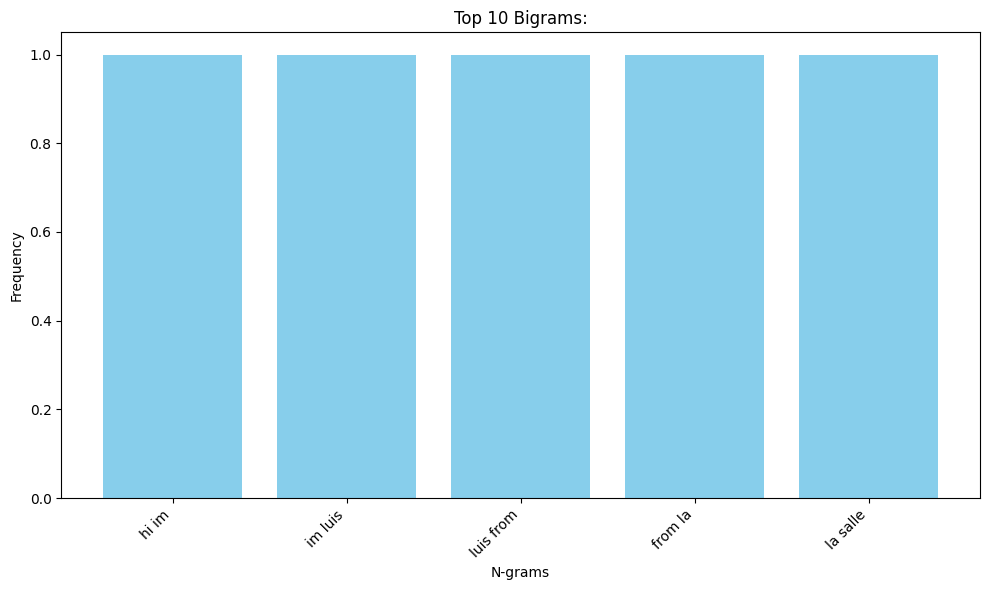


Top 10 Trigrams:
('hi', 'im', 'luis'): 1
('im', 'luis', 'from'): 1
('luis', 'from', 'la'): 1
('from', 'la', 'salle'): 1


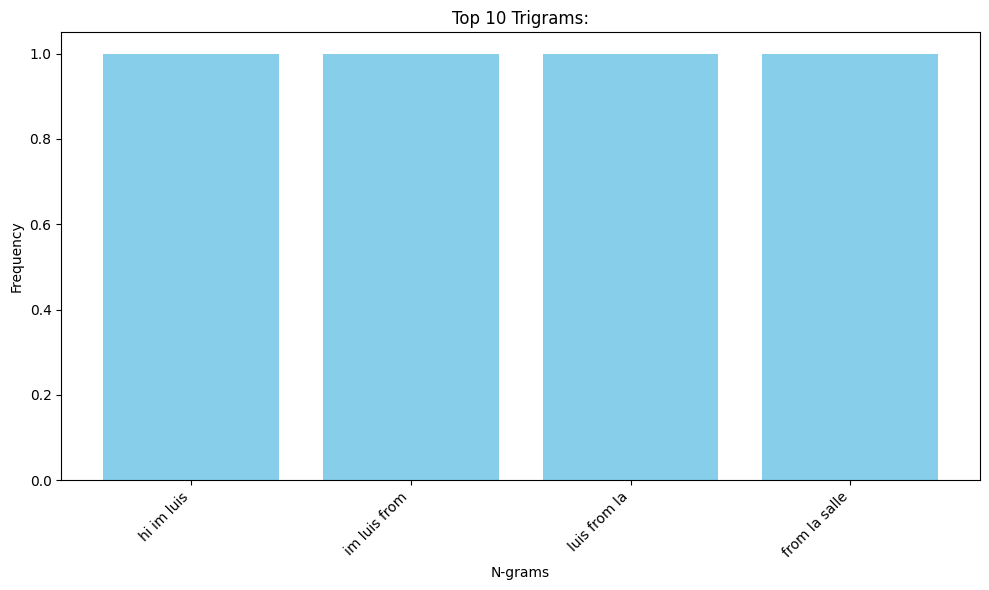


----------------
Your input text:
--> The core of extensible programming is defining functions. Python allows mandatory and optional arguments, keyword arguments, and even arbitrary argument lists. More about defining functions in Python 3

Top 10 Bigrams:
('defining', 'functions'): 2
('the', 'core'): 1
('core', 'of'): 1
('of', 'extensible'): 1
('extensible', 'programming'): 1
('programming', 'is'): 1
('is', 'defining'): 1
('functions', 'python'): 1
('python', 'allows'): 1
('allows', 'mandatory'): 1


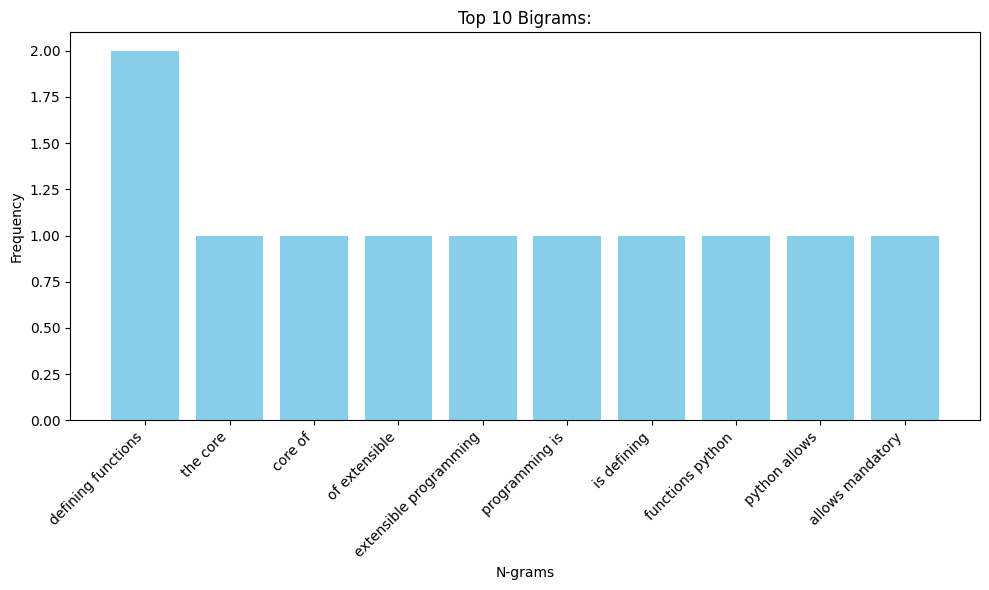


Top 10 Trigrams:
('the', 'core', 'of'): 1
('core', 'of', 'extensible'): 1
('of', 'extensible', 'programming'): 1
('extensible', 'programming', 'is'): 1
('programming', 'is', 'defining'): 1
('is', 'defining', 'functions'): 1
('defining', 'functions', 'python'): 1
('functions', 'python', 'allows'): 1
('python', 'allows', 'mandatory'): 1
('allows', 'mandatory', 'and'): 1


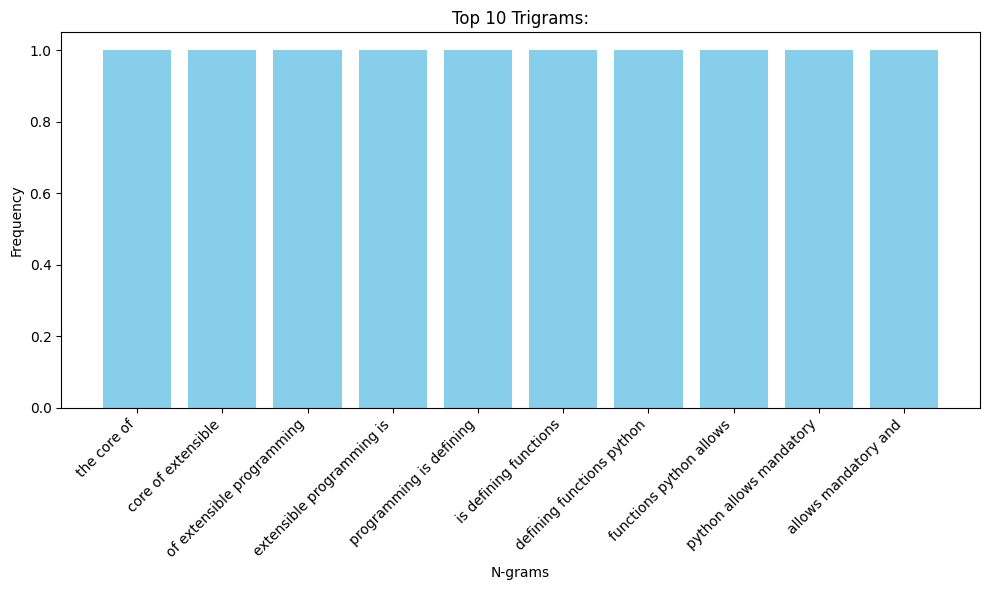


----------------
Your input text:
-->   hi 2nd year here, i think i’m losing interest in CS, cant seem for the life of me to stay focus in classes, lack of interest? lack of sleep? i really don’t understand my DSA, OOP, Discrete Math, and Database lectures anymore.  i chose CS cause i thought to myself, well that’s the major you’ll take if want to become a Front End/ Web dev right?  i never code outside school, and i never made projects on my own. i cheated on my code work by using AI. i just couldn’t for the life of me to sit down and study, maybe it’s ADHD (currently on the process of getting a diagnosis, but my psych said there is a possibility)  yet this was never a problem in my Calc class, Math just goes smoothly for me instead of programming. I never had a problem in learning Calculus. Applied Math is probably best option for me, but that major doesn’t exist at my local uni, BS Math with Specialization in Business Applications is probably the closest one.  A part of me thought 

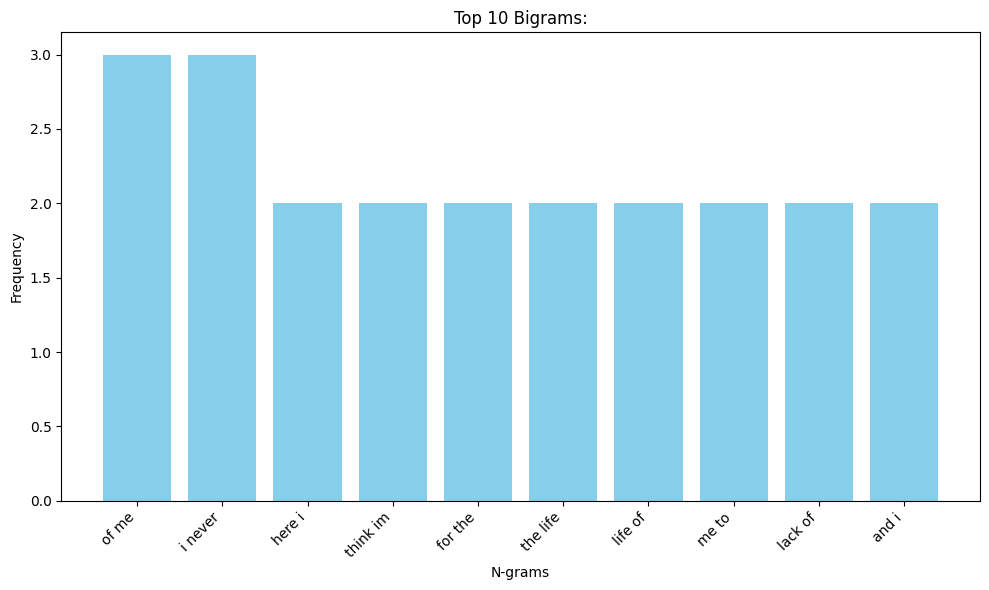


Top 10 Trigrams:
('for', 'the', 'life'): 2
('the', 'life', 'of'): 2
('life', 'of', 'me'): 2
('of', 'me', 'to'): 2
('a', 'problem', 'in'): 2
('hi', 'nd', 'year'): 1
('nd', 'year', 'here'): 1
('year', 'here', 'i'): 1
('here', 'i', 'think'): 1
('i', 'think', 'im'): 1


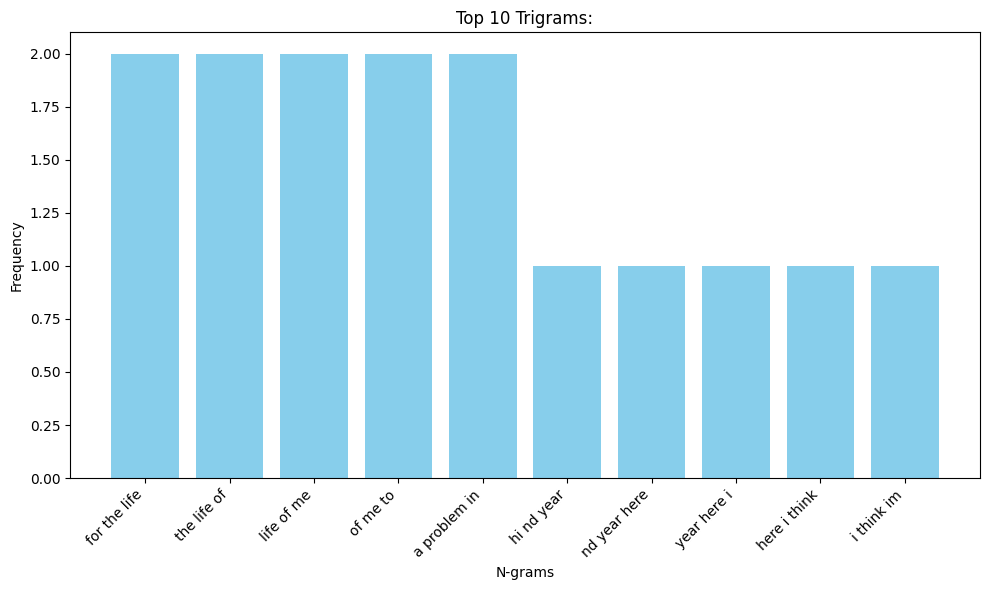


----------------
Your input text:
--> Globalization is a vague, opaque, and difficult word. Indeed, many people have trouble defining globalization. The word seems to mean many things – a global economy, international trade, growing prosperity in China and India, international travel and communication, immigration, migration, more foreign films and foods, McDonald’s in Paris, Starbucks in Africa, mosques in New York, an increase in ‘global’ problems such as climate change and terrorism. The word can mean everything and nothing.

Top 10 Bigrams:
('the', 'word'): 2
('globalization', 'is'): 1
('is', 'a'): 1
('a', 'vague'): 1
('vague', 'opaque'): 1
('opaque', 'and'): 1
('and', 'difficult'): 1
('difficult', 'word'): 1
('word', 'indeed'): 1
('indeed', 'many'): 1


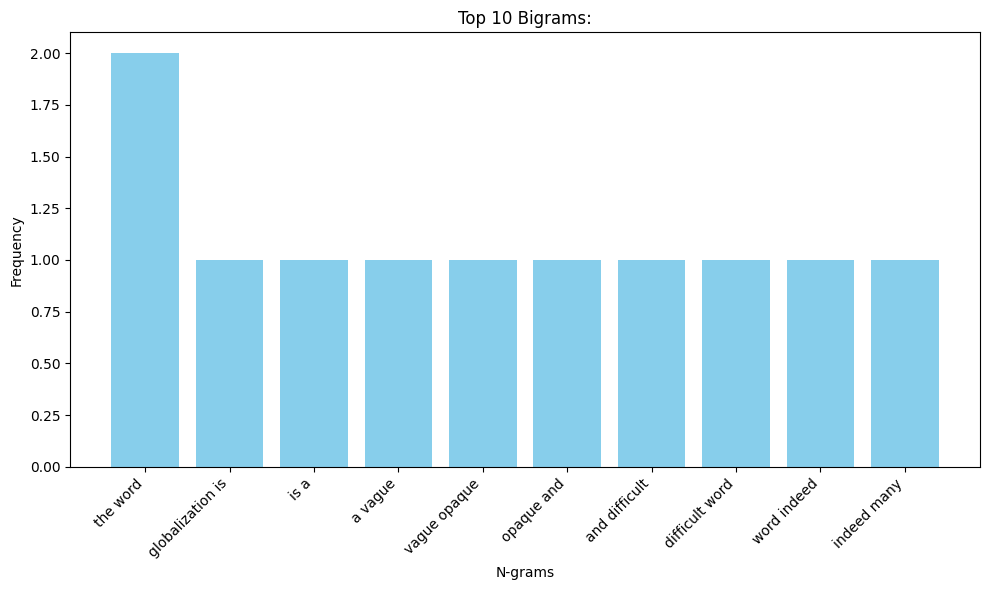


Top 10 Trigrams:
('globalization', 'is', 'a'): 1
('is', 'a', 'vague'): 1
('a', 'vague', 'opaque'): 1
('vague', 'opaque', 'and'): 1
('opaque', 'and', 'difficult'): 1
('and', 'difficult', 'word'): 1
('difficult', 'word', 'indeed'): 1
('word', 'indeed', 'many'): 1
('indeed', 'many', 'people'): 1
('many', 'people', 'have'): 1


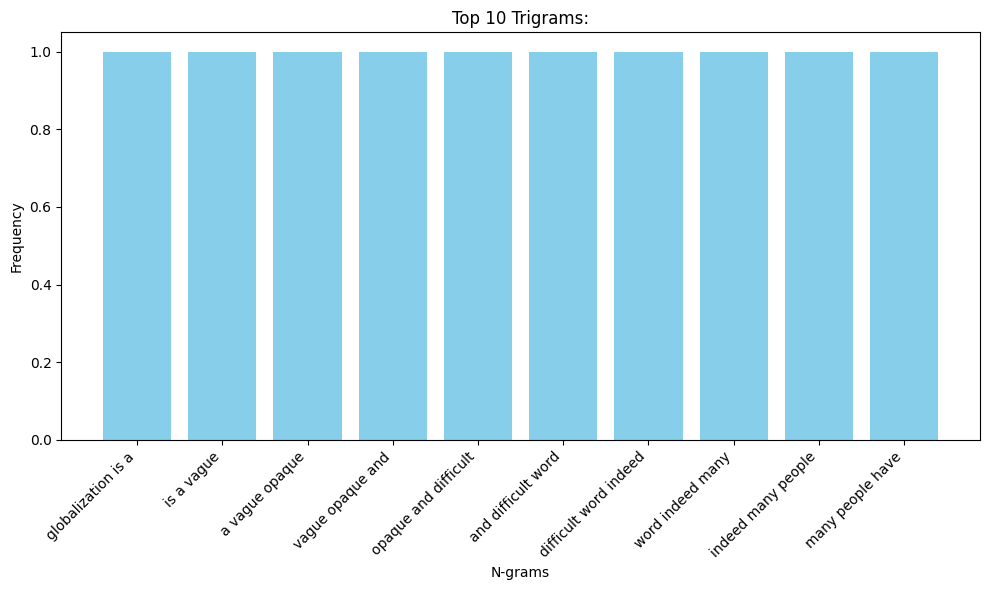


----------------
Your input text:
--> Sonic the Hedgehog [a] (commonly referred to as Sonic '06) is a 2006 platform game developed by Sonic Team and published by Sega. It was produced in commemoration of the Sonic series' 15th anniversary and as a reboot for seventh-generation video game consoles. Players control Sonic, Shadow, and the new character Silver, who battle Solaris, an ancient evil pursued by Doctor Eggman. Each playable character has his own campaign and abilities, and must complete levels, explore hub worlds and fight bosses to advance the story. In multiplayer modes, players can work cooperatively to collect Chaos Emeralds or race to the end of a level.  Development began in 2004, led by Sonic co-creator Yuji Naka. Sonic Team sought to create an appealing game in the vein of superhero films such as Batman Begins (2005), hoping it would advance the series with a realistic tone and multiple gameplay styles. Problems developed after Naka resigned to form his own company, Pr

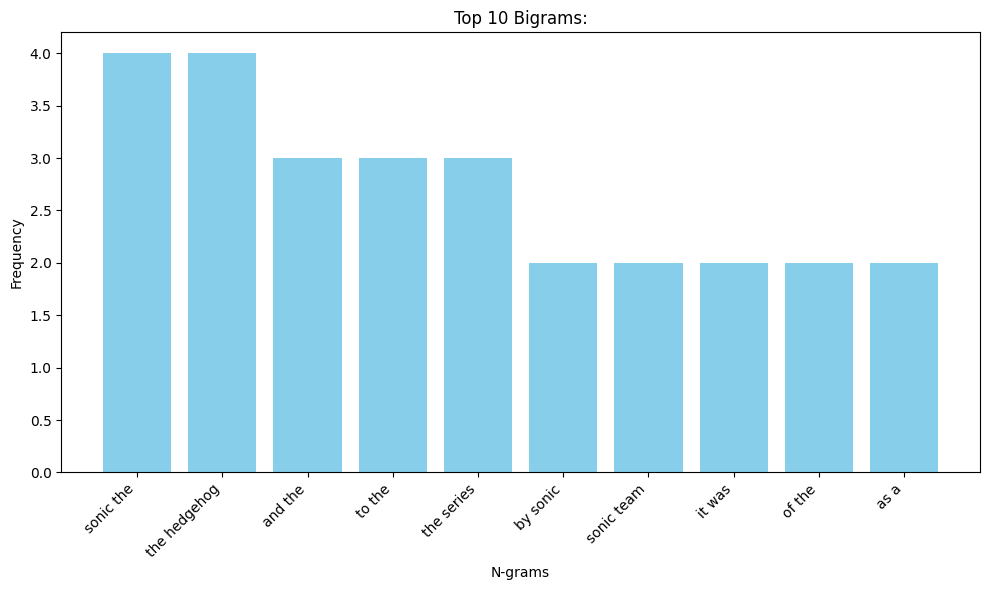


Top 10 Trigrams:
('sonic', 'the', 'hedgehog'): 4
('to', 'the', 'series'): 2
('the', 'hedgehog', 'a'): 1
('hedgehog', 'a', 'commonly'): 1
('a', 'commonly', 'referred'): 1
('commonly', 'referred', 'to'): 1
('referred', 'to', 'as'): 1
('to', 'as', 'sonic'): 1
('as', 'sonic', 'is'): 1
('sonic', 'is', 'a'): 1


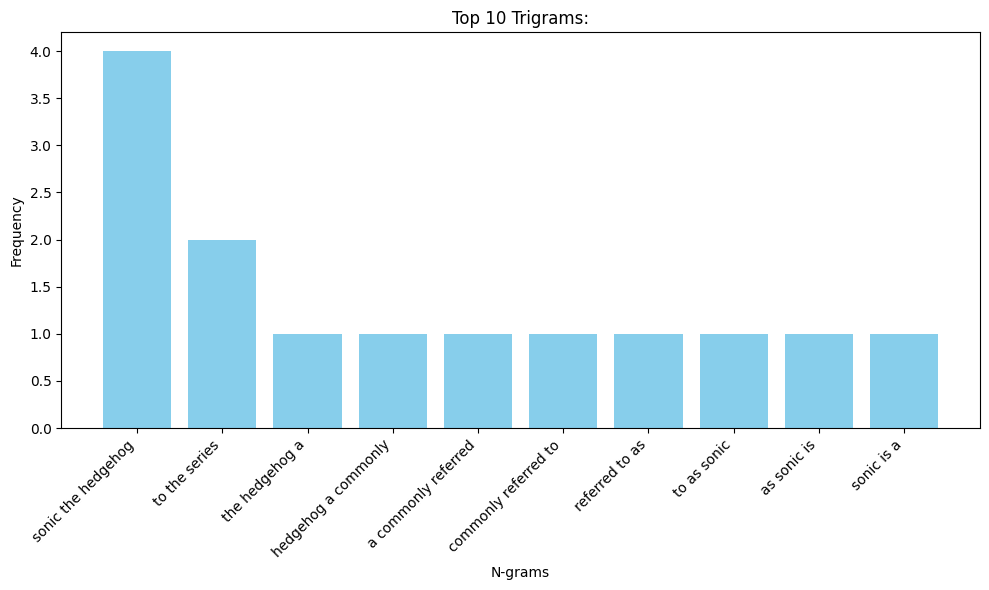


----------------


In [10]:
PROGRAM_COUNT: int = 5
program_outputs: int = 0

while program_outputs < PROGRAM_COUNT:
    main()
    program_outputs += 1

## Report on N-grams

**N-grams** are an algorithm to predict the use of future texts provided a given sample corpus. Relying on splitting a given set of text up into words and connecting them with each other, they can form a very simplified version of spell–checking and predictive typing tools.

The core of N–grams are **grams**, which are tuples of words next to each other in a given sentence. How big a tuple is depends on the value of the variable *N*, which can range from 2 to any higher integer value a developer may so choose. Using Latin–language prefixes, a gram of two words is a bigram, while a gram of three words is a trigram.

The more often a tuple is produced, the higher its frequency is and thus the higher its bar is on the many bar charts we plotted at the previous section of this notebook.

### Text Analysis Tools

Consuming the many sets of texts we typed or pasted in earlier requires the following functions, each of which served their function well:

- `build_ngram_model()` — This creates the grams I wrote in the second paragraph, based on the text ingested by the function.
- `calculate_ngram_probabilities()` — This computes how likely a gram is to be formed, relative to all other grams.
- `count_ngram_frequencies()` — Meanwhile, this computes as an absolute number how many times a gram was formed.
- `display_top_ngrams()` — This ranks the N–grams based on the frequency counts of the function above.

### The Text Preprocessing Tool

The `preprocess_text()` function converted the entirety of each input string into lowercase, removed characters that cannot be digested (such as punctuation, emoji and special symbols), and split the text into words which can be used by the N–gram model described above.

### Model Visualization Tools

- `plot_ngram_frequencies()` — This creates a bar chart for every list of frequencies that correspond to an executed N–gram model.
- `create_ngram_frequencies_label()` — This simply selects the appropriate term used for the model depending on the value of *N*.
- `analyze_text()` — This collects text input and runs all the functions above.
- `main()` — This runs the text analysis super–function repeatedly based on a configured setting.

### How Did The Model Go?

Bi–grams in this model captured very common combinations of words that can be used to promote good grammar while saving on computation expenses. Examples of these include the conjunctions “of the” and two–word proper nouns such as “Sonic Team.” Connecting nouns with linking verbs and conjunctions also seemed to be possible with further training using this bi–gram model.

Tri–grams listed were, for the most part, awkward to read as sets of three words are much less often used in everyday conversation. Exceptions include the specific proper noun “Sonic the Hedgehog,” which is the subject of the fifth input text. The rest felt random and did not look useful to data science in general.

## Grading Criteria

- **Functionality:** Does the program meet all requirements? (10 points)
- **Code Quality:** Is the code well-structured and commented? (10 points)
- **Testing:** Are various texts tested? Are results accurate? (5 points)
- **Report:** Is the report clear and informative? (5 points)